# Trim Race Logs


In [13]:
import os
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qgrid

In [14]:
## %matplotlib inline

In [15]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import process as p
import analysis as a
import chart as c
import metadata
import utils

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="DEBUG")

In [16]:
# Info about the race logs are stored in a DataFrame.
md = metadata.read_metadata()
log_info = metadata.summary_table(md.records, "date title file source begin end".split())

# The data in this table can be editted using a QGrid Control.  Click on the column header to sort.  Click again 
# to sort in a different order.  Double click on a cell to edit.
w = qgrid.show_grid(log_info, show_toolbar=True)
w


2020-06-11 16:32:05,273|INFO|read_metadata| Read 50 records.


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Trimming the data 

The logs start from the time we power up until we shutdown.  And this typically inclues 30-90 mins at the dock (or more).

The UI below (which is sort of unreliable right now) can be used to find the trim points.

On the left are two "sliders" (primitive, I know).  The first is used to determine the beginning of the data to show.  The second the end.  When you are done, the results are stored in `ch.begin` and `ch.end`.

Note, for some reason the UI freezes.  If so,  you can just re-run the command.  

## Quick Visualization Interface

Below we have added a bit of additional functionality to the qgrid interface:  When you select a row, that race track will be shown automatically.

Note, it takes a second (or two) between selecting a row and the display.  Its one of the only things that are a bit slow.

<IPython.core.display.Javascript object>


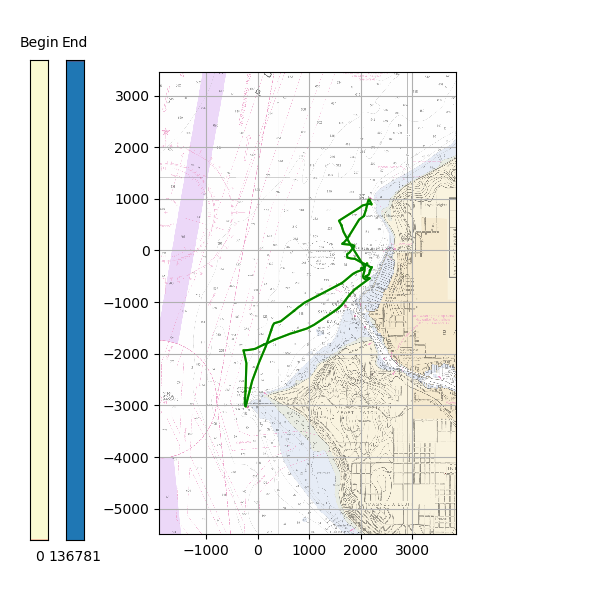

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

2020-06-11 16:32:26,192|INFO|read_metadata| Read 50 records.
2020-06-11 16:32:26,193|INFO|read_logs| Reading file 2020-05-16_10:06.pd.gz


selected row 39
displaying file: 2020-05-16 from 2020-05-16_10:06.pd.gz
Session from 2020-05-16 17:06:48.040000, 162526 rows, 4.514444444444444 hours.


2020-06-11 16:32:27,591|INFO|read_logs| Found 162516 records before trim.
2020-06-11 16:32:27,622|INFO|read_logs| Trimming to 9771 146553
2020-06-11 16:32:27,644|DEBUG|run_system_command| Running command: rm /tmp/mbtile.tif
2020-06-11 16:32:27,653|DEBUG|run_system_command| Command finished in 0.008 seconds.
2020-06-11 16:32:27,653|DEBUG|run_system_command| Running command: gdalwarp  -te -122.4640021 47.6379041 -122.3874655 47.7183932  -te_srs EPSG:4326  -t_srs ' +proj=tmerc +lat_0=47.6873070 +lon_0=-122.4386440 +k_0=0.9996 +datum=WGS84 +units=m +no_defs ' -ts 0 2000 -r bilinear Data/MBTILES/MBTILES_06.mbtiles /tmp/mbtile.tif
2020-06-11 16:32:28,193|DEBUG|run_system_command| Command finished in 0.539 seconds.
2020-06-11 16:32:28,311|DEBUG|create_figure| Creating figure Figure(600x600)


In [17]:
# create a function that is called "back" when a row is selected

CHART = None

def trim():
    if CHART is not None and CHART.is_trimmed:
        G.logger.info("Trimming.")
        race_logs.trim_race(CHART.race, CHART.begin, CHART.end)

def show(args, _):
    global CHART
    trim()
    # Args are a bit obscure
    row_num = args['new'][0]  # The newly selected row numbers, selected the first
    print(f"selected row {row_num}")
    # Need to used the changed df, in case of reordering, etc.
    row = w.get_changed_df().iloc[row_num]
    print(f"displaying file: {row.date} from {row.file}")
    df, race = race_logs.read_date(row.date)
    CHART = c.trim_track(df, fig_or_num=fig)
    CHART.race = race

fig = plt.figure(figsize=(6, 6))
w = qgrid.show_grid(log_info, show_toolbar=True)
display(w)

# Bind the callback
w.on('selection_changed', show)


In [7]:

# optionally trim the 
trim()

2020-06-11 15:58:52,547|INFO|read_metadata| Read 50 records.
2020-06-11 15:58:52,547|INFO|save_metadata| Writing 50 records.
2020-06-11 15:58:52,548|DEBUG|ensure_directory| Directory Data/Backup alread exists.
2020-06-11 15:58:52,550|DEBUG|backup_file| Backing up Data/metadata.yml to Data/Backup/metadata.yml_00.
